# PageRank

In [ ]:
%pylab notebook
import numpy as np
import numpy.linalg as la
from readonly.PageRankFunctions import *
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
L = np.array([[0,   1/2, 1/3, 0, 0,   0 ],
              [1/3, 0,   0,   0, 1/2, 0 ],
              [1/3, 1/2, 0,   1, 0,   1/2 ],
              [1/3, 0,   1/3, 0, 1/2, 1/2 ],
              [0,   0,   0,   0, 0,   0 ],
              [0,   0,   1/3, 0, 0,   0 ]])

In [ ]:
eVals, eVecs = la.eig(L) # Gets the eigenvalues and vectors
order = np.absolute(eVals).argsort()[::-1] # Orders them by their eigenvalues
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0] # Sets r to be the principal eigenvector
100 * np.real(r / np.sum(r)) # Make this eigenvector sum to one, then multiply by 100 Procrastinating Pats

array([ 16.        ,   5.33333333,  40.        ,  25.33333333,
         0.        ,  13.33333333])

In [ ]:
r = 100 * np.ones(6) / 6 
r

array([ 16.66666667,  16.66666667,  16.66666667,  16.66666667,
        16.66666667,  16.66666667])

Next, let's update the vector to the next minute, with the matrix $L$.
Run the following cell multiple times, until the answer stabilises.

In [ ]:
r = L @ r 
r

array([ 13.88888889,  13.88888889,  38.88888889,  27.77777778,
         0.        ,   5.55555556])

We can automate applying this matrix multiple times as follows,

In [ ]:
r = 100 * np.ones(6) / 6 # Sets up this vector (6 entries of 1/6 × 100 each)
for i in np.arange(100) : # Repeat 100 times
    r = L @ r
r

array([ 16.        ,   5.33333333,  40.        ,  25.33333333,
         0.        ,  13.33333333])

In [ ]:
r = 100 * np.ones(6) / 6 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = L @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = L @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

18 iterations to convergence.


array([ 16.00149917,   5.33252025,  39.99916911,  25.3324738 ,
         0.        ,  13.33433767])

In [ ]:
 # We'll call this one L2, to distinguish it from the previous L.
L2 = np.array([[0,   1/2, 1/3, 0, 0,   0, 0 ],
               [1/3, 0,   0,   0, 1/2, 0, 0 ],
               [1/3, 1/2, 0,   1, 0,   1/3, 0 ],
               [1/3, 0,   1/3, 0, 1/2, 1/3, 0 ],
               [0,   0,   0,   0, 0,   0, 0 ],
               [0,   0,   1/3, 0, 0,   0, 0 ],
               [0,   0,   0,   0, 0,   1/3, 1 ]])

In [ ]:
r = 100 * np.ones(7) / 7 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = L2 @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = L2 @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

131 iterations to convergence.


array([  0.03046998,   0.01064323,   0.07126612,   0.04423198,
         0.        ,   0.02489342,  99.81849527])

In [ ]:
d = 0.5 
M = d * L2 + (1-d)/7 * np.ones([7, 7]) 

In [ ]:
r = 100 * np.ones(7) / 7 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = M @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = M @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

8 iterations to convergence.


array([ 13.68217054,  11.20902965,  22.41964343,  16.7593433 ,
         7.14285714,  10.87976354,  17.90719239])

## Part 2 - Assessment

In [ ]:
import numpy as np
import numpy.linalg as la
from readonly.PageRankFunctions import *
np.set_printoptions(suppress=True)

In [ ]:
def pageRank(linkMatrix, d) :
    n = linkMatrix.shape[0]
    M = d * linkMatrix + (1-d)/n * np.ones([n, n])
    r = 100 * np.ones(n) / n # Sets up this vector (6 entries of 1/6 × 100 each)
    last = r
    r = M @ r
    while la.norm(last - r) > 0.01 :
        last = r
        r = M @ r
    return r


In [ ]:
generate_internet(5)

array([[ 0.2,  0.2,  0. ,  0. ,  0.2],
       [ 0.2,  0.2,  0. ,  0. ,  0.2],
       [ 0.2,  0.2,  0. ,  0. ,  0.2],
       [ 0.2,  0.2,  1. ,  0. ,  0.2],
       [ 0.2,  0.2,  0. ,  1. ,  0.2]])

In [ ]:
L = generate_internet(10)

In [ ]:
pageRank(L, 1)

array([  4.54513629,   4.54513629,   9.09153148,  27.27154494,
        18.18240602,   4.54513629,   9.09153148,   4.54513629,
        13.63730464,   4.54513629])

In [ ]:
eVals, eVecs = la.eig(L) # Gets the eigenvalues and vectors
order = np.absolute(eVals).argsort()[::-1] # Orders them by their eigenvalues
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0]
100 * np.real(r / np.sum(r))

array([  4.54545455,   4.54545455,   9.09090909,  27.27272725,
        18.18181818,   4.54545455,   9.09090909,   4.54545455,
        13.63636363,   4.54545455])

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


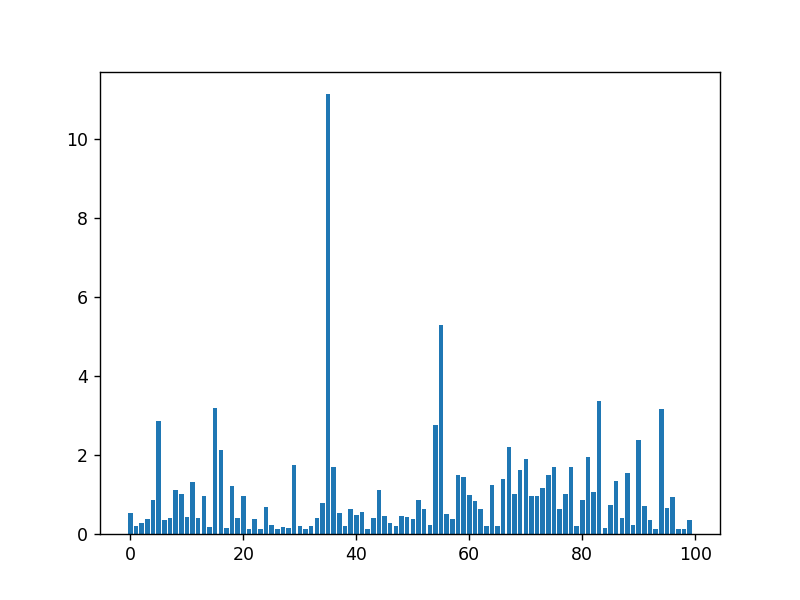

In [ ]:
%pylab notebook
r = pageRank(generate_internet(100), 0.9)
plt.bar(arange(r.shape[0]), r);